# Exploratory data analaysis for production data

## Set export to True if you wish to export graphs and tables


In [1]:
seed = 1337
export = False

In [12]:
%matplotlib inline

import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
from os import listdir
from matplotlib.patches import Patch
from matplotlib.cm import get_cmap
from sklearn.cluster import KMeans
from auxiliary_code.helper_functions import *

In [16]:
df_prod = pd.read_csv('../datasets/production_processed.csv', parse_dates=['date'])
set_index(df_prod)

df_shape = get_shape_file('../geography/Somalia/Som_Admbnda_Adm2_UNDP.shp')

df_loc = pd.read_csv('../datasets/locations_processed.csv').set_index('area')

,,district,Cowpea,Ground Nuts,Maize,Onion,Pepper,Rice,Sesame,Sorghum,Tomato,Water Melon
area,date,,,,,,,,,,,
adan yabaal,1995-07-01,Adan Yabaal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.00,NaN,NaN
afgooye,1995-07-01,Afgooye,NaN,NaN,16.381,NaN,NaN,NaN,NaN,409.00,NaN,NaN
afmadow,1995-07-01,Afmadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baardheere,1995-07-01,Baardheere,NaN,NaN,138.000,NaN,NaN,NaN,NaN,5.18,NaN,NaN
badhaadhe,1995-07-01,Badhaadhe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
tayeeglow,2021-07-01,Tayeeglow,12.0,NaN,14.000,NaN,NaN,NaN,NaN,220.00,NaN,NaN
waajid,2021-07-01,Waajid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00,NaN,NaN
wanla weyn,2021-07-01,Wanla weyn,NaN,NaN,3.540,NaN,NaN,NaN,330.0,5.00,NaN,NaN


In [19]:
df_sum = df_prod.describe().transpose().iloc[:, 1:]
isna_series = df_prod.isna().mean() * 100
isna_series.rename('% missing', inplace=True)
df_sum = df_sum.merge(isna_series, left_index=True, right_index=True)
df_sum

,mean,std,min,25%,50%,75%,max,% missing
Cowpea,179.119790,253.860930,0.0,18.0000,67.5,231.75,1650.000,66.876310
Ground Nuts,351.026852,360.981421,1.0,120.0000,284.0,400.00,1600.000,97.735849
Maize,208.363045,297.252424,1.0,4.9560,54.0,315.00,1800.000,31.698113
Onion,288.565743,434.797831,0.0,1.9175,55.0,460.50,1680.000,92.662474
Pepper,24.317460,22.696330,0.0,10.0000,16.0,30.00,120.000,97.358491
Rice,87.498750,170.347887,0.0,1.9000,3.3,53.60,600.000,98.993711
Sesame,279.798483,343.216021,0.0,24.0000,135.0,440.00,1920.000,76.058700
Sorghum,178.290961,293.301076,0.0,5.1225,30.0,215.00,1916.915,41.802935
Tomato,365.264099,375.412357,1.0,120.0000,240.0,450.00,1600.000,93.249476
Water Melon,346.860000,420.108276,0.0,11.5000,250.0,500.00,1900.000,97.023061


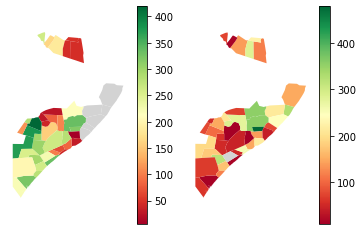

In [18]:
fig, ax = plt.subplots(ncols=2)
missing_kwds = {"color": "lightgrey","label": "Missing values"}
df_mean_prod_area = df_prod.groupby('area').mean()
df_plot = df_shape.merge(df_mean_prod_area, left_index=True, right_index=True)
df_plot.plot(column='Maize', cmap='RdYlGn', legend=True, ax=ax[0], missing_kwds=missing_kwds)
df_plot.plot(column='Sorghum', cmap='RdYlGn', legend=True, ax=ax[1], missing_kwds=missing_kwds)

ax[0].axis('off');
ax[1].axis('off');


if export:
    fig.savefig('../Figures/mean_prod_per_area.png', dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='date'>

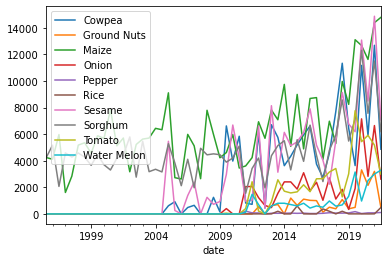

In [20]:
df_prod.groupby('date').sum().plot()

<AxesSubplot:xlabel='date'>

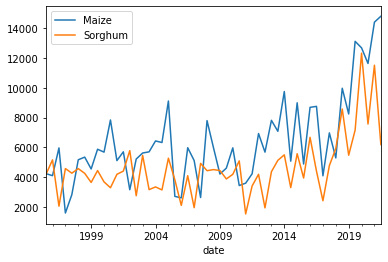

In [22]:
df_prod[['Maize', 'Sorghum']].groupby('date').sum().plot()